In [193]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.tree import  DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import seaborn as sns

In [194]:
from google.colab import files
uploaded = files.upload()

Saving Company_Data.csv to Company_Data (1).csv


In [195]:
data = pd.read_csv('Company_Data.csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# **EDA**

In [196]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [197]:
data.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [198]:
data[data.duplicated()] #no duplicate values

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [200]:
data.corr()

<ipython-input-200-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


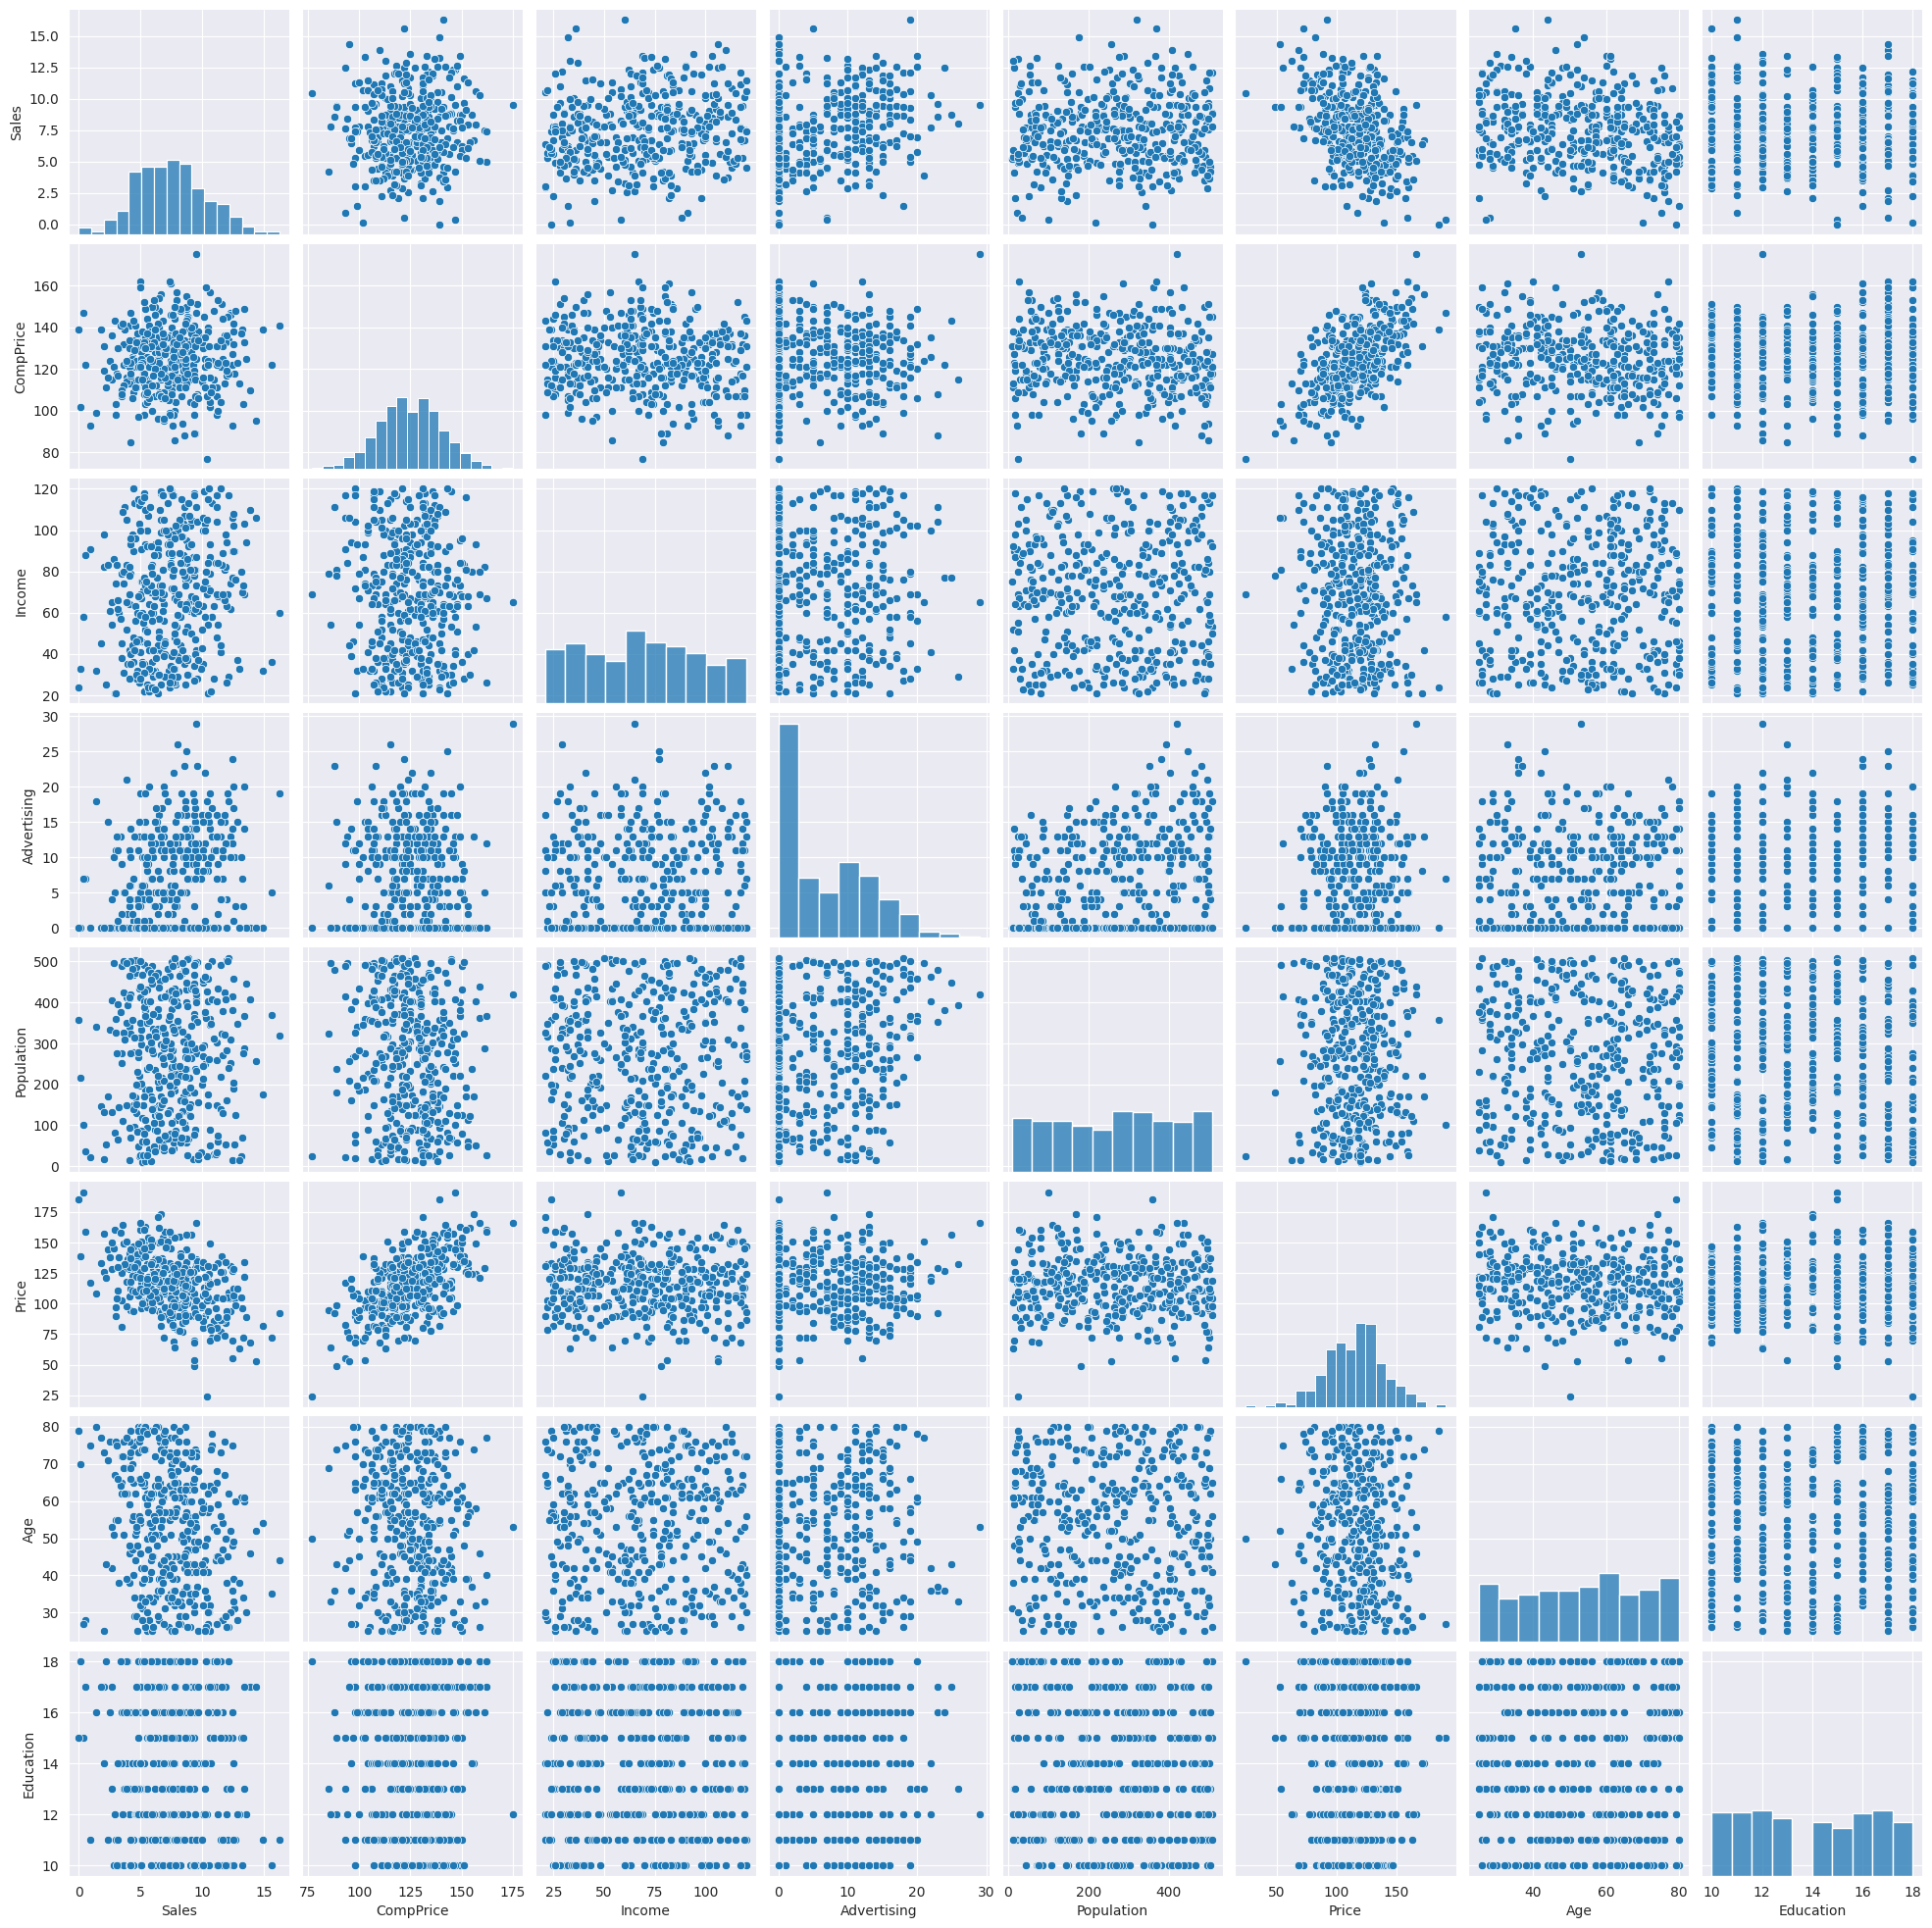

In [201]:
sns.set_style(style = 'darkgrid')
sns.pairplot(data)

In [202]:
data.info() #400 rows, 11 columns and no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [199]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


# **Feature Engineering**

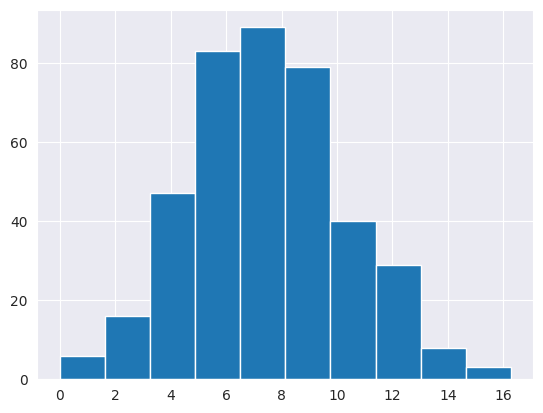

In [203]:
plt.hist('Sales',data= data)
plt.show()

**As the Sales distribution is not skewed and it is normal distribution we can take mean or median as a threshold to make two categories 'Low' and 'High' Sales**

In [204]:
sale_val = []
for value in data['Sales']:
    if value <= 7.49:
        sale_val.append("low")
    else:
        sale_val.append("high")

data["sale_val"]= sale_val

In [220]:
data['sale_val'].value_counts()

low     201
high    199
Name: sale_val, dtype: int64

In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
 11  sale_val     400 non-null    object 
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [207]:
numerical_features = data.describe(include=["int64", "float64"]).columns
numerical_features

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

In [208]:
categorical_features = data.describe(include=["object"]).columns
categorical_features

Index(['ShelveLoc', 'Urban', 'US', 'sale_val'], dtype='object')

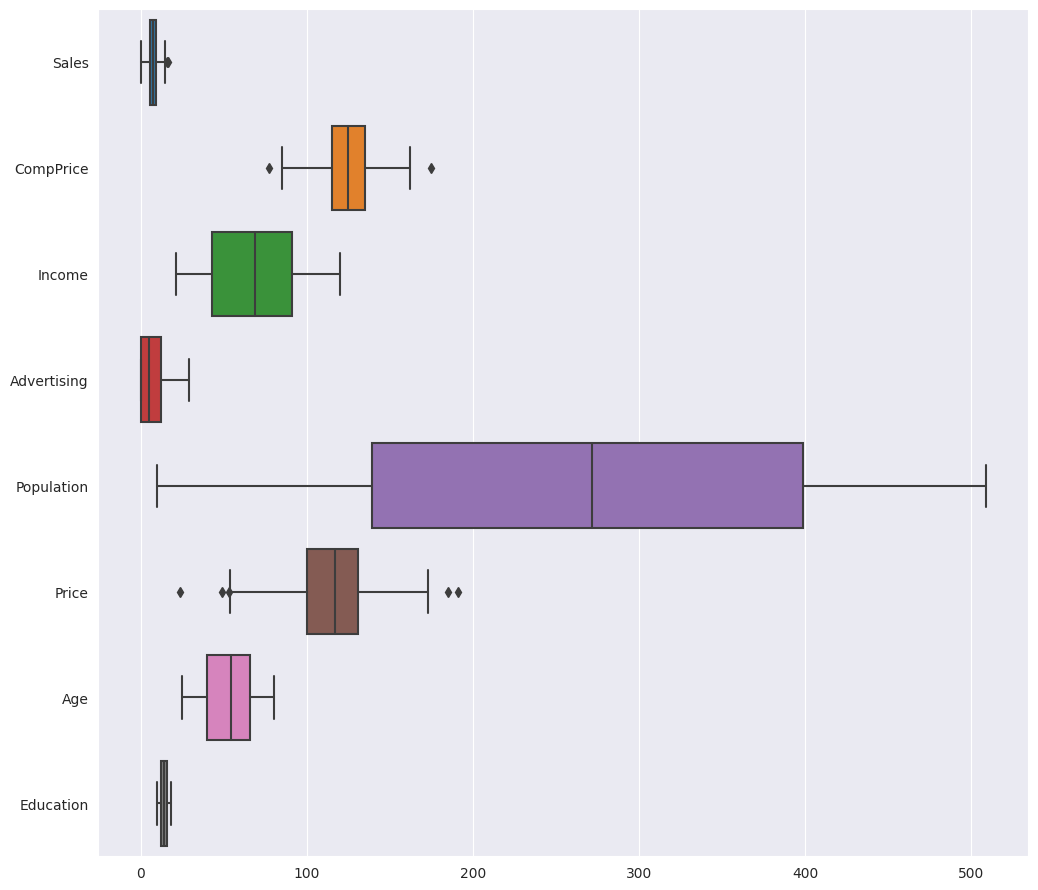

In [209]:
plt.figure(figsize=(12, 11))
sns.boxplot(data= data[numerical_features], orient="h")
plt.show()

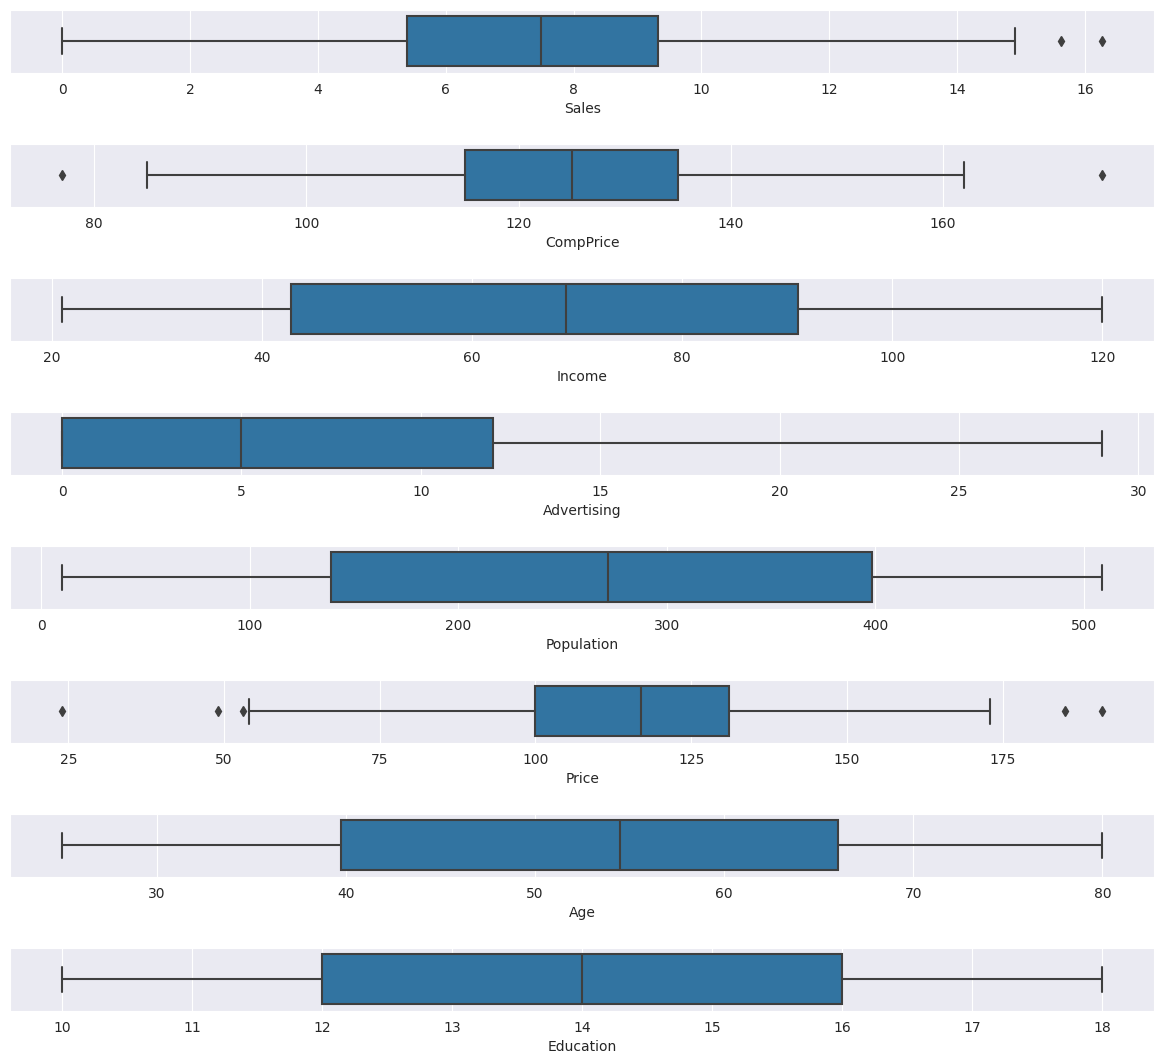

In [210]:
outlier = data.copy()
fig, axes = plt.subplots(8,1,figsize=(12, 11))
sns.boxplot(x='Sales',data= outlier,ax=axes[0])
sns.boxplot(x='CompPrice',data= outlier,ax=axes[1])
sns.boxplot(x='Income',data= outlier,ax=axes[2])
sns.boxplot(x='Advertising',data= outlier,ax=axes[3])
sns.boxplot(x='Population',data= outlier,ax=axes[4])
sns.boxplot(x='Price',data= outlier,ax=axes[5])
sns.boxplot(x='Age',data= outlier,ax=axes[6])
sns.boxplot(x='Education',data= outlier,ax=axes[7])
plt.tight_layout(pad=2.0)

**Population has a mean that is much superior to the other constituents**

Index(['ShelveLoc', 'Urban', 'US', 'sale_val'], dtype='object')


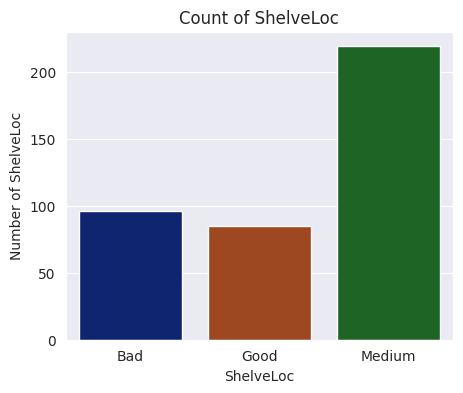

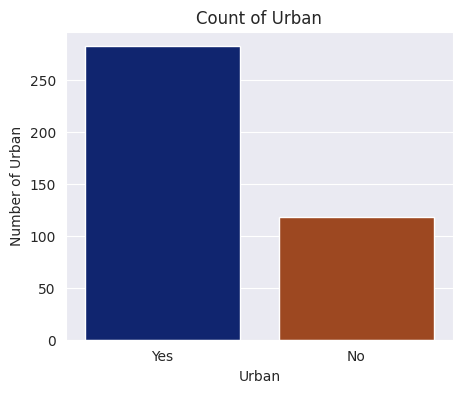

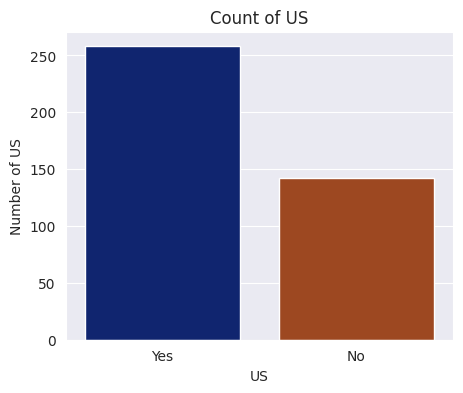

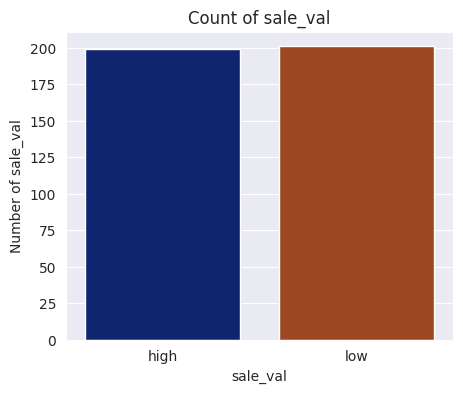

In [213]:
print(categorical_features)

for idx, column in enumerate(categorical_features):
    plt.figure(figsize=(5,4))
    unique = data[column].value_counts(ascending=True);

    plt.title("Count of "+ column)
    sns.countplot(data= data, x=column,palette = "dark")
    plt.xticks(rotation = 0, size = 10)

    plt.xlabel(column, fontsize=10)
    plt.ylabel("Number of "+ column, fontsize=10)

In [214]:
#categorical data is converted into numerical
label = preprocessing.LabelEncoder()
data['ShelveLoc'] = label.fit_transform(data['ShelveLoc'])
data['Urban'] = label.fit_transform(data['Urban'])
data['US'] = label.fit_transform(data['US'])

In [215]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sale_val
0,9.50,138,73,11,276,120,0,42,17,1,1,high
1,11.22,111,48,16,260,83,1,65,10,1,1,high
2,10.06,113,35,10,269,80,2,59,12,1,1,high
3,7.40,117,100,4,466,97,2,55,14,1,1,low
4,4.15,141,64,3,340,128,0,38,13,1,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,high
396,6.14,139,23,3,37,120,2,55,11,0,1,low
397,7.41,162,26,12,368,159,2,40,18,1,1,low
398,5.94,100,79,7,284,95,0,50,12,1,1,low


In [216]:
data['ShelveLoc'].value_counts() #Bad=0, Good=1, Medium=2

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [217]:
data['Urban'].value_counts() #No=0, Yes=1

1    282
0    118
Name: Urban, dtype: int64

In [218]:
data['US'].value_counts() #No=0, Yes=1

1    258
0    142
Name: US, dtype: int64

In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    int64  
 11  sale_val     400 non-null    object 
dtypes: float64(1), int64(10), object(1)
memory usage: 37.6+ KB


In [222]:
data1 = data.drop(['Sales'], axis=1)

In [223]:
data1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sale_val
0,138,73,11,276,120,0,42,17,1,1,high
1,111,48,16,260,83,1,65,10,1,1,high
2,113,35,10,269,80,2,59,12,1,1,high
3,117,100,4,466,97,2,55,14,1,1,low
4,141,64,3,340,128,0,38,13,1,0,low


In [224]:
#defining independent and dependent varibales
x = data1.iloc[:, 0:10] #independet variable
y = data1['sale_val'] #dependent variable

In [225]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [226]:
y

0      high
1      high
2      high
3       low
4       low
       ... 
395    high
396     low
397     low
398     low
399    high
Name: sale_val, Length: 400, dtype: object

In [227]:
data1['sale_val'].unique()

array(['high', 'low'], dtype=object)

In [228]:
data1.sale_val.value_counts()

low     201
high    199
Name: sale_val, dtype: int64

In [229]:
#splitting data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0) #20% data will go to test

# **Building Decision Tree Clssifier using Entropy Criteria**

# **C5.0**

In [230]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3) #prepruning
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [231]:
x_test.value_counts()

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  Education  Urban  US
93         106     12           416         55     2          75   15         1      1     1
           117     9            489         83     0          42   13         1      1     1
134        103     13           25          144    2          76   17         0      1     1
           48      1            139         145    2          65   12         1      1     1
           37      0            27          120    1          49   16         1      1     1
                                                                                          ..
121        42      4            188         118    2          54   15         1      1     1
           41      5            412         110    2          54   10         1      1     1
120        56      20           266         90     0          78   18         1      1     1
118        83      13           276         104    0          75   10      

In [232]:
x_train.value_counts()

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  Education  Urban  US
77         69      0            25          24     2          50   18         1      0     1
85         79      6            325         95     2          69   13         1      1     1
132        107     0            144         125    2          33   13         0      0     1
           98      2            265         97     0          62   12         1      1     1
           69      0            123         122    2          27   11         0      0     1
                                                                                          ..
118        35      14           502         137    2          79   10         0      1     1
           32      0            284         110    1          63   13         1      0     1
117        118     14           445         120    2          32   15         1      1     1
           100     4            466         97     2          55   14      

In [233]:
y_train.value_counts()

low     166
high    154
Name: sale_val, dtype: int64

In [234]:
data1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sale_val
0,138,73,11,276,120,0,42,17,1,1,high
1,111,48,16,260,83,1,65,10,1,1,high
2,113,35,10,269,80,2,59,12,1,1,high
3,117,100,4,466,97,2,55,14,1,1,low
4,141,64,3,340,128,0,38,13,1,0,low


Text(0.5, 1.0, 'Decision Tree using entropy criteria')

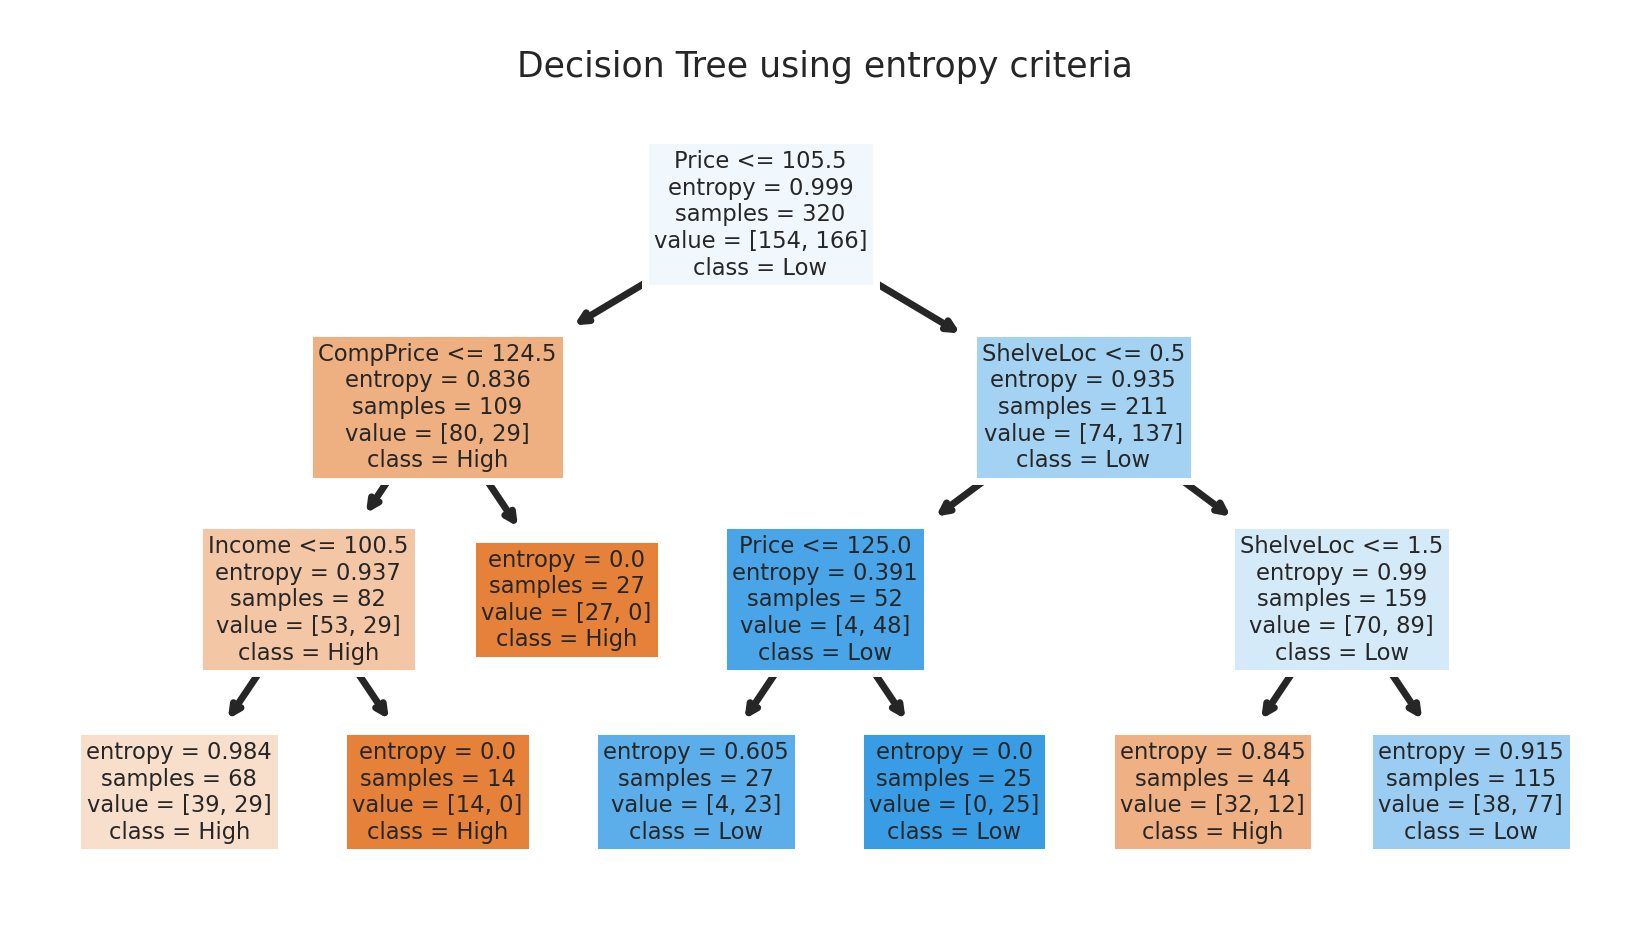

In [235]:
#Visualizing decision tree
fn = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US'] #columns
cn = ['High', 'Low'] #value_count.keys
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,2), dpi = 500) #dpi = dot per inch
tree.plot_tree(model, feature_names = fn, class_names = cn, filled = True); #leaf node will be colored
plt.title('Decision Tree using entropy criteria',fontsize=5)
#samples=x_train, value=y_train
#7 leaf nodes

# **Predicting on Test Data**

In [236]:
pred = model.predict(x_test) #predicting on test dataset
pd.Series(pred).value_counts() #getting the count of each category

high    40
low     40
dtype: int64

In [237]:
#yactual
y_test.value_counts()

high    45
low     35
Name: sale_val, dtype: int64

In [238]:
pred

array(['high', 'high', 'high', 'low', 'high', 'low', 'high', 'low', 'low',
       'low', 'low', 'low', 'low', 'high', 'low', 'low', 'high', 'low',
       'low', 'low', 'low', 'high', 'high', 'high', 'low', 'high', 'low',
       'low', 'low', 'high', 'low', 'high', 'high', 'high', 'low', 'high',
       'high', 'low', 'low', 'high', 'low', 'high', 'low', 'high', 'high',
       'low', 'low', 'high', 'high', 'low', 'low', 'high', 'high', 'high',
       'low', 'high', 'low', 'high', 'high', 'low', 'low', 'high', 'low',
       'low', 'high', 'low', 'low', 'high', 'low', 'low', 'high', 'high',
       'high', 'low', 'low', 'high', 'high', 'high', 'high', 'high'],
      dtype=object)

In [239]:
pd.crosstab(y_test, pred) #getting the 2 way table to understand the correct and worng predictions
#59 are correct predictions, 21 are wrong predctions

col_0,high,low
sale_val,,
high,32,13
low,8,27


# **Accuracy**

In [240]:
np.mean(pred == y_test), accuracy_score(y_test, pred)

(0.7375, 0.7375)

## **73.75% Accuracy through Entropy**

# **Building Decision Tree Classifier using GINI Criteria**

# **CART**

In [241]:
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)

In [242]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

Text(0.5, 1.0, 'Decision Tree using gini criteria')

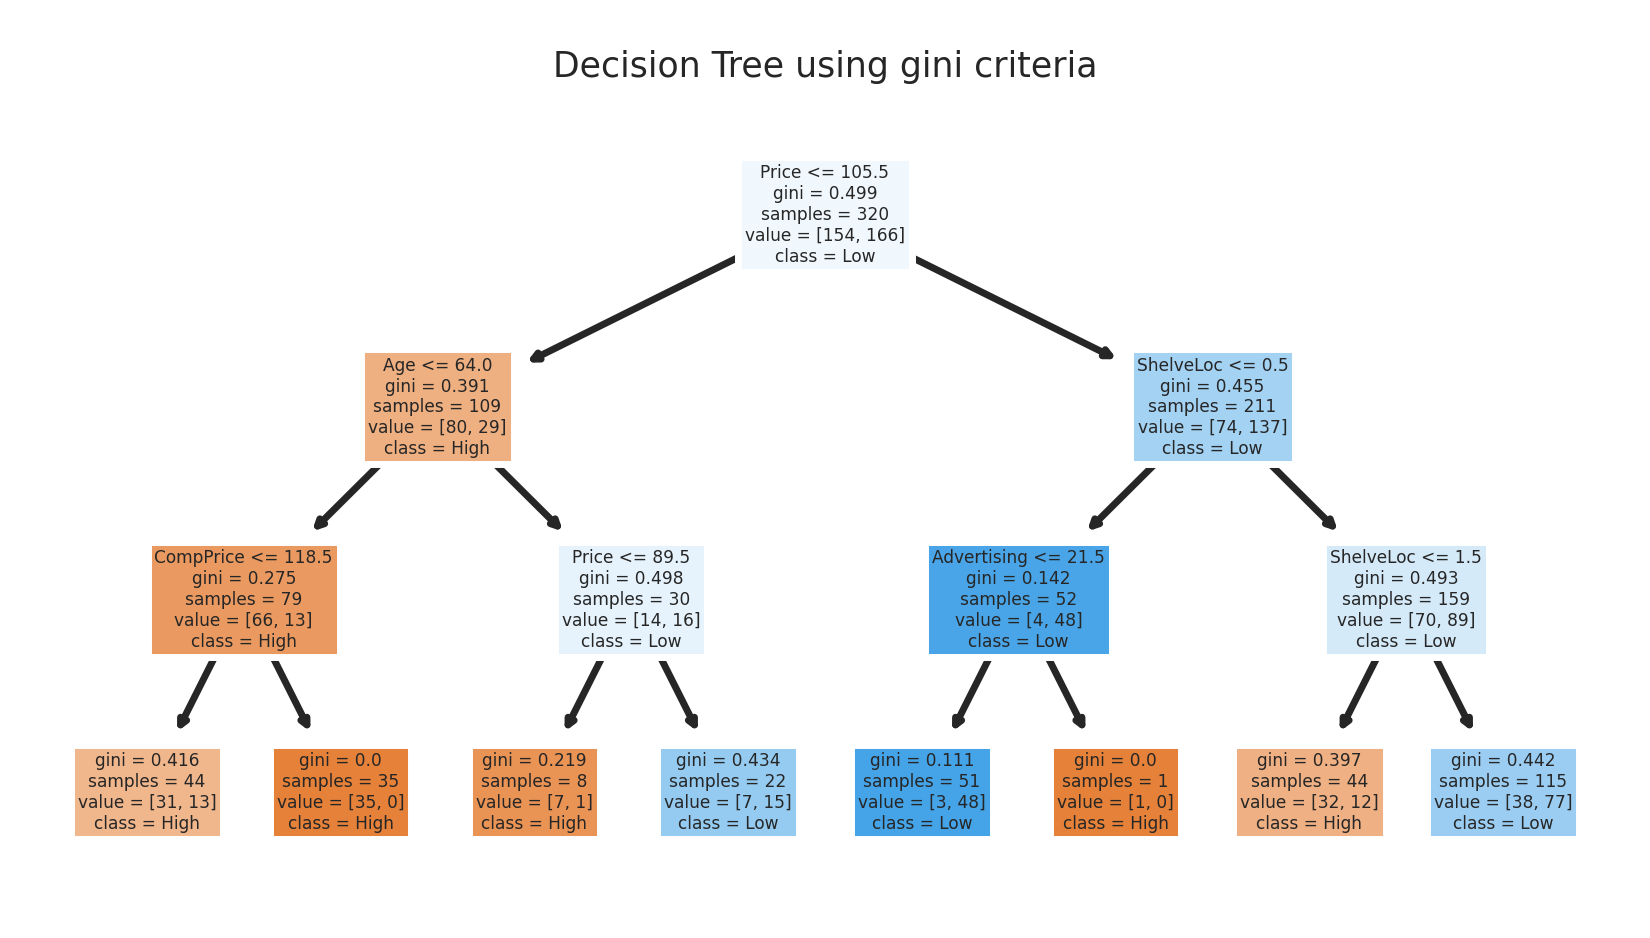

In [243]:
#Visualizing decision tree
fn = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US'] #columns
cn = ['High', 'Low'] #value_count.keys
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,2), dpi = 500) #dpi = dot per inch
tree.plot_tree(model_gini, feature_names = fn, class_names = cn, filled = True); #leaf node will be colored
plt.title('Decision Tree using gini criteria',fontsize=5)
#samples=x_train, value=y_train
#8 leaf nodes

In [244]:
#Predicting Values on Test Data
pred_gini=model_gini.predict(x_test)
pd.Series(pred_gini).value_counts() #Getting the count of each category

low     44
high    36
dtype: int64

In [245]:
pred_gini

array(['high', 'high', 'low', 'low', 'low', 'low', 'high', 'low', 'low',
       'low', 'low', 'low', 'low', 'high', 'low', 'low', 'high', 'low',
       'low', 'low', 'low', 'high', 'high', 'high', 'low', 'high', 'low',
       'low', 'low', 'low', 'low', 'high', 'high', 'high', 'low', 'high',
       'high', 'low', 'low', 'high', 'low', 'high', 'low', 'high', 'low',
       'low', 'low', 'high', 'high', 'low', 'low', 'high', 'high', 'high',
       'low', 'high', 'low', 'high', 'high', 'low', 'low', 'high', 'low',
       'low', 'high', 'low', 'low', 'high', 'low', 'low', 'high', 'high',
       'high', 'low', 'low', 'high', 'high', 'high', 'high', 'high'],
      dtype=object)

In [246]:
pd.crosstab(y_test, pred_gini) #getting the 2 way table to understand the correct and worng predictions
#63 are correct predictions, 17 are wrong predctions

col_0,high,low
sale_val,,
high,32,13
low,4,31


In [247]:
np.mean(pred_gini == y_test), accuracy_score(y_test, pred_gini)

(0.7875, 0.7875)

# **78.75% Accuracy**